In [1]:
import numpy as np
from mfactorization import mf
from util.data_reader import read_interaction_matrix
from util import easy_eval, heatmaps

rand = np.random.default_rng(1234)

R = read_interaction_matrix()

single_eps = np.linspace(500, 1200, 3, True).astype(int)
batch_ep = [0]
# batch_ep = np.linspace(0, 200, 4).astype(int)
# single_lr = [0.02]
single_lr = 0.1 ** (np.linspace(1.8,3.2,4, True))
batch_sam = [0]
# batch_sam = 0.1 ** (np.linspace(1,4,4, True))
single_sample_size = 0.1 ** (np.linspace(0.5, 3, 3, True))

scores = np.zeros([len(x) for x in [single_eps, batch_ep, single_lr, batch_sam, single_sample_size]])

for i, s_ep in enumerate(single_eps):
    for j, b_ep in enumerate(batch_ep):
        for k, sin_lr in enumerate(single_lr):
            for l, bat_s in enumerate(batch_sam):
                for m, sin_s in enumerate(single_sample_size):
                    if s_ep == 0 and b_ep == 0:
                        continue

                    r = rand.random()
                    if r > 0.5:
                        continue

                    # try:
                    print(f'''
                        ep: batch {b_ep}, single {s_ep}
                        sample size: batch {bat_s:.2e} single {sin_s:.2e}
                        lr: single {sin_lr:.2e}
                        ''')
                    
                    q,p = mf(
                        R, 
                        n_epochs=s_ep + b_ep, 
                        n_latent=16, 
                        batch_sample_s=bat_s, 
                        sample_s=sin_s,
                        single_epochs=s_ep, 
                        single_lr=sin_lr,
                        print_step=2
                        )
                    
                    S =q@p.T
                    scores[i,j,k,l,m] = easy_eval(S)
                    
                    # heatmaps([S[0:10, 0:10]])
                    # print()
                        
                    # except:
                    #     pass


                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 1.58e-02
                        


256it [00:06, 40.93it/s]

err: 1.85e+04, lr: 0.0158489 

500it [00:11, 41.81it/s]


best error: 8.38e+03

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 3.16e-01
                        lr: single 5.41e-03
                        


253it [00:27, 10.23it/s]

err: 3.34e+02, lr: 0.0054116 

358it [00:38,  9.14it/s]

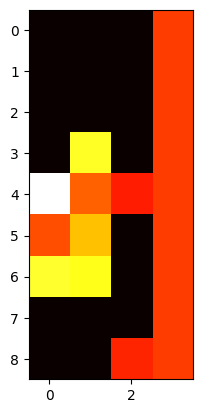

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.86, 0.  ],
       [1.1 , 0.56, 0.45],
       [0.53, 0.72, 0.  ],
       [0.87, 0.85, 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.46]])

In [ ]:
sc2d = scores.reshape((-1, 3))
heatmaps([sc2d])
sc2d

In [ ]:
i = np.unravel_index(12, scores.shape)
scores[i]

1.1

In [ ]:
sep, slr = single_eps[i[0]], single_lr[i[2]]
i, sep, slr

((1, 0, 1, 0, 0), 1000, 0.00316227766016838)

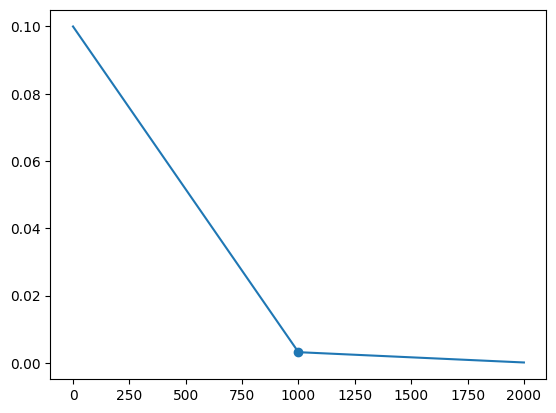

In [ ]:
import matplotlib.pyplot as plt

plt.plot(single_eps, single_lr)
plt.scatter(sep, slr)

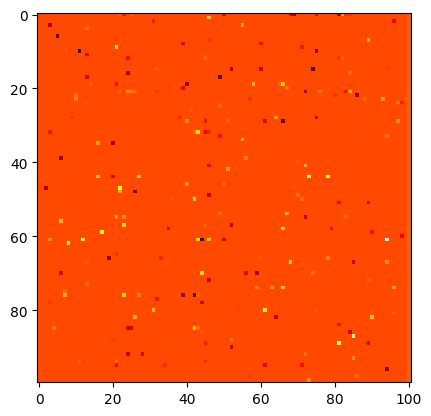

In [ ]:
heatmaps([(S * R * 10)[0:100, 0:100]]) 

In [ ]:
scores[1, 0, 2, 0, 2]

0.0

In [ ]:
scores.reshape((-1, 4))

array([[0.  , 0.  , 0.54, 0.79],
       [0.52, 0.53, 0.63, 0.52]])